In [1]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from ReliefF import ReliefF
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import hdbscan
from sklearn.preprocessing import StandardScaler

C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the data

data = pd.read_csv(r'C:\Users\Kumarappan M\Desktop\Case Study\mental-heath-in-tech-2016_20161114.csv')
data.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

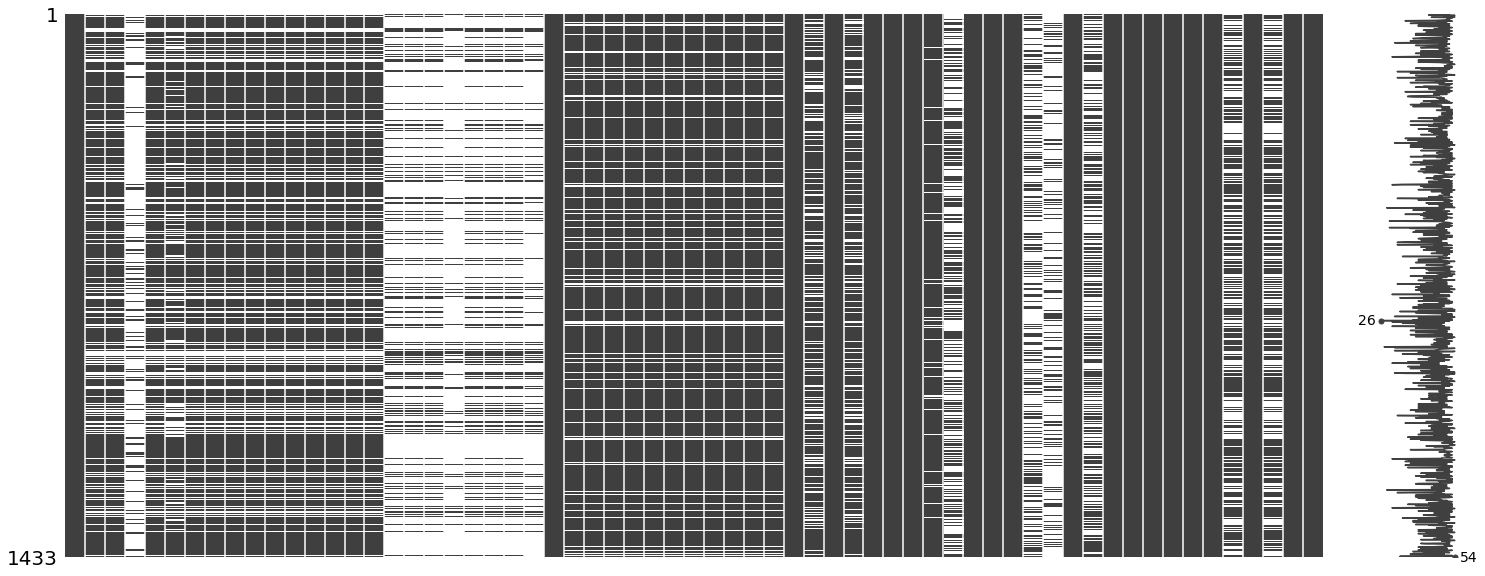

In [3]:
# lets Check for null values

msno.matrix(data)
data.isnull().sum()

# Pre - Processing

In [4]:
# After inspecting we can see that there are a lot of null values.

# There are 63 questions and 1433 responses by individuals to those questions of which 13 are not answered by more than 50% of the individuals 
# 716.5 is half of 1433 total responses recorded per question
# We will drop these values 

features=(list(data))

count=0
Q_NA=[]
for col in features:
    
    if(sum(pd.isnull(data[col]))>716.5):
        count=count+1
        Q_NA.append(col)
      
print(len(Q_NA))

data.drop([i for i in Q_NA],axis=1,inplace=True)

13


In [5]:
# i will also drop the following features as they are not necessary or are empty

drop_feature=['What US state or territory do you work in?','Why or why not?','Why or why not?.1','What US state or territory do you live in?'\
,'Which of the following best describes your work position?','What country do you live in?']

data.drop([i for i in drop_feature],axis=1,inplace=True)



In [6]:
# From further investigation i found that the 287 NAN values in most coloumns are due to the fact that people who are self employed didnt
# answer the questions. if you remove the NAN values youre left with only people who are not self employed. so we remove this column.

data.drop(['Are you self-employed?','Do you have previous employers?'],axis=1,inplace=True)


In [7]:
K_features=(list(data))
print(len(K_features))

# We now remove the 287 NAN values under the self employed column
count=0
for index,col in enumerate(K_features):
    j=data.index[data[col].isnull()]
    
    if(len(j)==287):
       
        k=j
        count+=1


data.drop(k,inplace=True)
data.shape
    

42


(1146, 42)

In [8]:
# after we dropped the 287 values we have 131 common NA values which we will drop also.

count=0
for index,col in enumerate(K_features):
    j=data.index[data[col].isnull()]
    
    if(len(j)==131):
        
        k=j
        count+=1

data.drop(k,inplace=True)
data.shape

(1015, 42)

In [9]:
# As you can see there are 3 more columns with very few NA values which i will address next
pd.DataFrame(data.isnull().sum())

,0
How many employees does your company or organization have?,0
Is your employer primarily a tech company/organization?,0
Does your employer provide mental health benefits as part of healthcare coverage?,0
Do you know the options for mental health care available under your employer-provided coverage?,117
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?,0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,0
"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",0
Do you think that discussing a mental health disorder with your employer would have negative consequences?,0
Do you think that discussing a physical health issue with your employer would have negative consequences?,0


In [10]:
# we now replace the the remaining NA values with mode of their respective columns , mode in other words refers to highly repeated value.
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
    

# As you can see we are rid of all NA values and have a clean data set.    
pd.DataFrame(data.isnull().sum())




,0
How many employees does your company or organization have?,0
Is your employer primarily a tech company/organization?,0
Does your employer provide mental health benefits as part of healthcare coverage?,0
Do you know the options for mental health care available under your employer-provided coverage?,0
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?,0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,0
"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",0
Do you think that discussing a mental health disorder with your employer would have negative consequences?,0
Do you think that discussing a physical health issue with your employer would have negative consequences?,0


In [11]:
# First we are going to rename two important columns so we dont have to type the long name everytime 

data.rename(columns={'What is your age?':'Age','What is your gender?':'Gender'},inplace=True)

# the gender column seems to have a lot of different variables which could prove to be difficult when Encoding feautres and bias our model so we covert them into 3 uniform groups

data['Gender'] = data['Gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
data['Gender'] = data['Gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
data['Gender'] = data['Gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Other')



In [12]:
# you can now see the results of our transformation , there are only 3 groups in the gender column as observed below.
pd.DataFrame(data.Gender.value_counts())

,Gender
Male,749
Female,245
Other,21


<AxesSubplot:xlabel='Age', ylabel='Count'>

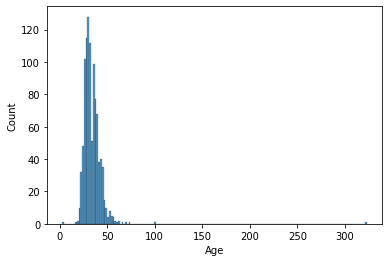

In [13]:
# we will now check the distribution of the Age

sns.histplot(data=data.Age)


In [14]:
# From intial analysis of the histplot above you can observe the possibility of ouliers present in ages which need to be removed 
# To remove these outliers , i will check for values out side the 99th and 1st percentile as the values outside these ranges are considered outliers 

# CAPPING USING PERCENTILE METHOD

import numpy as np

def outlier_detection(df):
    outlier=[]
    for i in df:
        quartile_1 = np.percentile(df , 1)
        quartile_3 = np.percentile(df , 99)
        if i > quartile_3 or i < quartile_1:
            outlier.append(i)
    print("Outliers:",outlier)
    return outlier
    
outliers = outlier_detection(data.Age)



Outliers: [17, 20, 99, 61, 19, 323, 58, 3, 66, 59, 63, 19, 74, 70, 63]


<AxesSubplot:xlabel='Age', ylabel='Count'>

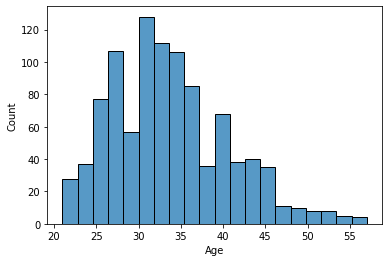

In [15]:
# We will now remove these outliers and represent them visually 

cleaned_data = data.loc[~data.Age.isin(outliers)]
sns.histplot(cleaned_data.Age)

# we now have a much cleaner Age coulumn as compared to the one before removing outliers

### Encoding

In [16]:
# We will now use Ordinal encoder to change categorical values into numerical values so we can per form PCA and cluster them later.
from category_encoders.ordinal import OrdinalEncoder

encoded_data = cleaned_data
Ordinal = OrdinalEncoder()
encoded_data = Ordinal.fit_transform(cleaned_data.drop(['Age'], axis=1))

In [38]:
# New DataFrame 
# We add the age back afte the data has been encoded to numercical values, the reson we didny include age is due to the age already being a numerical column type.
# We only need to Encode categorical features

encoded_data['Age'] = cleaned_data.Age

encoded_data.head(3)

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,treatment,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Gender,What country do you work in?,Do you work remotely?,Age
0,1,1.0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,39
1,2,1.0,2,2,2,2,2,2,1,1,...,1,2,1,1,2,2,1,2,2,29
2,2,1.0,2,1,1,1,1,3,2,1,...,2,1,2,1,1,1,1,1,3,38


# Feature Selection

#### We will try 4 different feature selection methods and compare the results to find the best possible feautre combination

* Correlation
* Chi - 2 ( Univariate test )
* Feature Importance
* Relief

#### Correlation

Correlation shed insights on the linear dependence between variables 

correlation = 1 implies the features are dependant 
correlation = 0 implies the features are not dependent


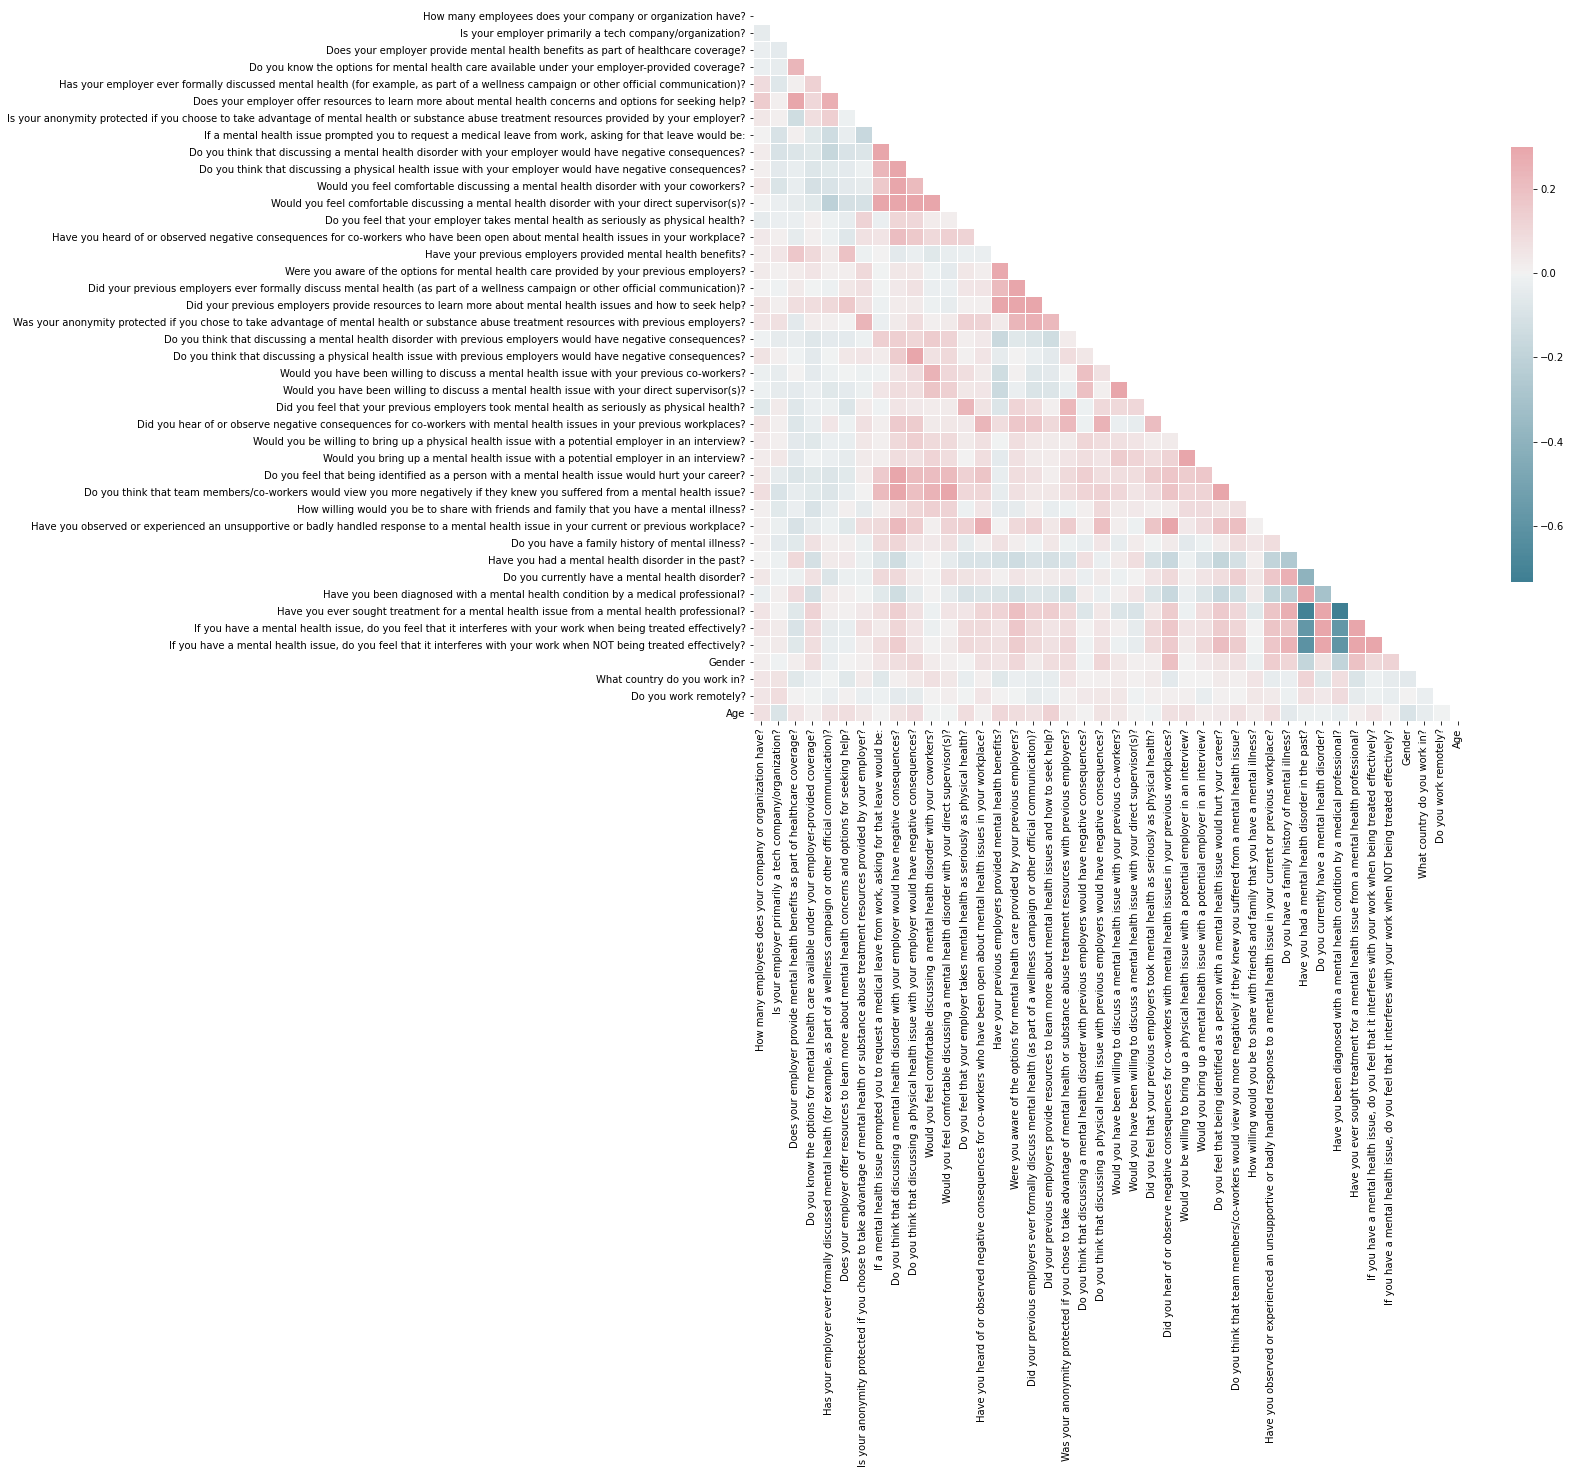

In [18]:
# We use the corr function to generate a correlation heatmap

corr = encoded_data.corr(method ='spearman')
mask_1 = np.zeros_like(corr, dtype=bool)
mask_1[np.triu_indices_from(mask_1)] = True
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask_1, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

##### There is a very high correlation between

* ' Have you been diagnosed with a mental health condition by a medical professional? '  And  ' Have you ever sought treatment for a mental health issue from a mental health professional? '

* ' Have you ever sought treatment for a mental health issue from a mental health professional? '  And  ' Have you had a mental disorder in the past '

##### Our target variable here is the ' Have you ever sought treatment for a mental health issue from a mental health professional? ' 

In [19]:
# For simplicity purposes i will rename the target variable to 'treatment'

encoded_data.rename(columns={'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treatment' } , inplace=True)

# Now we will look at the correlation between the target variable with all other variables.

correlations = encoded_data.corr().unstack().sort_values(ascending=False) # Building correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Converting to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Labeling the columns for easier processing
correlations.query("col1 == 'treatment' & col2 != 'treatment'") # Filtering by variable treatment



,col1,col2,correlation
48,treatment,"If you have a mental health issue, do you feel...",0.551641
52,treatment,"If you have a mental health issue, do you feel...",0.517259
86,treatment,Do you currently have a mental health disorder?,0.301895
106,treatment,Do you have a family history of mental illness?,0.248540
153,treatment,Gender,0.193152
178,treatment,Do you feel that being identified as a person ...,0.173199
196,treatment,Have you observed or experienced an unsupporti...,0.163342
212,treatment,Were you aware of the options for mental healt...,0.153721
236,treatment,Did you hear of or observe negative consequenc...,0.144785
253,treatment,Do you think that discussing a mental health d...,0.139790


In [20]:
# we subset just the top 12 features 

ten_head = correlations.query("col1 == 'treatment' & col2 != 'treatment'")
ten_head = ten_head.head(12)
ten_head




,col1,col2,correlation
48,treatment,"If you have a mental health issue, do you feel...",0.551641
52,treatment,"If you have a mental health issue, do you feel...",0.517259
86,treatment,Do you currently have a mental health disorder?,0.301895
106,treatment,Do you have a family history of mental illness?,0.248540
153,treatment,Gender,0.193152
178,treatment,Do you feel that being identified as a person ...,0.173199
196,treatment,Have you observed or experienced an unsupporti...,0.163342
212,treatment,Were you aware of the options for mental healt...,0.153721
236,treatment,Did you hear of or observe negative consequenc...,0.144785
253,treatment,Do you think that discussing a mental health d...,0.139790


In [21]:
# List of top 12 features printed as list this time as i couldnt see the full names of the features in a df view

top_12 = ten_head['col2'].tolist()
top_12

['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
 'Do you currently have a mental health disorder?',
 'Do you have a family history of mental illness?',
 'Gender',
 'Do you feel that being identified as a person with a mental health issue would hurt your career?',
 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'Were you aware of the options for mental health care provided by your previous employers?',
 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Did your previous employers provide resources to learn more about mental 

# Univariate Selection - Chi 2

In [39]:
y = encoded_data.treatment    #target column i.e treatment
X = encoded_data.drop(['treatment'],axis=1)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features

,Specs,Score
32,Have you had a mental health disorder in the p...,220.774583
35,"If you have a mental health issue, do you feel...",164.330315
38,What country do you work in?,160.859083
36,"If you have a mental health issue, do you feel...",128.241215
34,Have you been diagnosed with a mental health c...,89.964256
33,Do you currently have a mental health disorder?,28.447488
27,Do you feel that being identified as a person ...,20.453917
30,Have you observed or experienced an unsupporti...,16.992505
31,Do you have a family history of mental illness?,16.220182
15,Were you aware of the options for mental healt...,11.885966


In [23]:
ten = featureScores.nlargest(12,'Score')
ten_1 = ten.Specs.tolist()

# Feature Importance

[0.01275861 0.00746932 0.01247945 0.01155802 0.0080367  0.01134422
 0.00874603 0.01356096 0.01150116 0.00789754 0.01003453 0.0098632
 0.01119949 0.00544498 0.01233992 0.01677405 0.01243752 0.00930796
 0.00953548 0.01130606 0.00902176 0.0114818  0.0098208  0.01129557
 0.00849702 0.01126523 0.01071153 0.01110891 0.01103554 0.01469476
 0.01359265 0.03542861 0.14892096 0.05343293 0.23796252 0.07154385
 0.06933663 0.01074584 0.0147004  0.00960448 0.01220303]


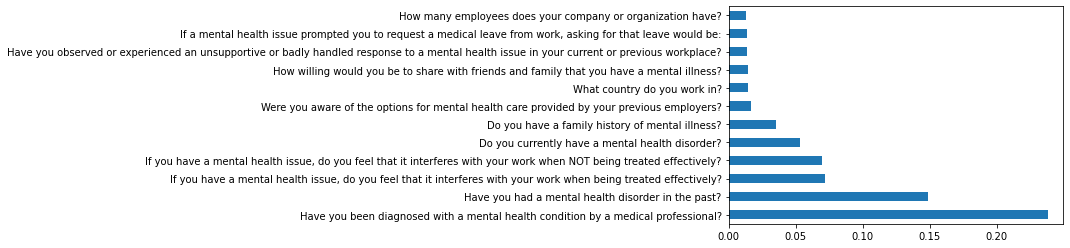

In [24]:
y = encoded_data.treatment    #target column i.e treatment
X = encoded_data.drop(['treatment'],axis=1)

# fit the model
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plotting graph of important features for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(12).plot(kind='barh')
plt.show()


# Relief

In [25]:
fs = ReliefF(n_neighbors=1, n_features_to_keep=12)
features = fs.fit_transform(encoded_data.drop(['treatment'], axis=1).to_numpy(), encoded_data['treatment'].to_numpy()).T
columns = encoded_data.drop(['treatment'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (encoded_data.drop(['treatment'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-12 features: \n', reliefF_features)

Top-12 features: 
 ['Have you been diagnosed with a mental health condition by a medical professional?', 'Have you had a mental health disorder in the past?', 'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?', 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', 'Do you currently have a mental health disorder?', 'What country do you work in?', 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?', 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?', 'Is your employer primarily a tech company/organization?', 'Do you think that discussing a physical health issue with your employer would have negative consequences?', 'If you have a mental health issue, do you feel that it interferes wi

In [26]:
# These are features with the most correlation in other words that have the most impact on our prediction
selected_features = ['Have you had a mental health disorder in the past?',
 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
 'Do you currently have a mental health disorder?',
 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
 'Gender',
 'What country do you work in?',
 'Have you been diagnosed with a mental health condition by a medical professional?',
 'Do you feel that being identified as a person with a mental health issue would hurt your career?',
  'Were you aware of the options for mental health care provided by your previous employers?',
  'Do you have a family history of mental illness?',
  'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?']


# We now subset the select features on the encoded data and rename the coulumns for easier processing

selected_features_1 = encoded_data[selected_features]
selected_features_1.rename(columns={'Have you had a mental health disorder in the past?':'past_hist','If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?':'not_effectively_treated','Do you currently have a mental health disorder?':'current_status',
'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?':'effectively_treated','What country do you work in?':'country','Have you been diagnosed with a mental health condition by a medical professional?':'diagnosis',
'Do you feel that being identified as a person with a mental health issue would hurt your career?':'career_effect','Were you aware of the options for mental health care provided by your previous employers?':'awareness_program','Do you have a family history of mental illness?':'family_hist',
'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':'obs_consequnces'},inplace=True)
selected_features_1['treatment'] = encoded_data.treatment
selected_features_1

C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,past_hist,not_effectively_treated,current_status,effectively_treated,Gender,country,diagnosis,career_effect,awareness_program,family_hist,obs_consequnces,treatment
0,1,1,1,1,1,1,1,1,1,1,1,0
1,1,2,2,2,1,2,1,2,2,2,1,1
2,2,1,1,1,1,1,2,1,1,1,2,1
4,1,2,2,3,2,2,1,3,1,2,3,1
5,3,3,2,1,1,1,2,3,3,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,2,4,3,2,1,3,2,3,4,3,1,0
1426,1,3,2,2,2,3,1,5,1,3,3,1
1427,1,3,2,2,2,2,1,1,2,2,3,1
1430,1,2,3,2,1,2,1,5,2,2,4,1


## Normalization

In [27]:
# if you dont standardize you observe that these values are spread out far apart, which isnt ideal.

Scaler = StandardScaler()
scaled = Scaler.fit_transform(selected_features_1)
scaled



array([[-0.88532602, -1.20968901, -1.12263127, ..., -1.23058219,
        -0.91436682, -1.19711738],
       [-0.88532602, -0.15961174,  0.19192525, ...,  0.20032733,
        -0.91436682,  0.83533997],
       [ 0.24104296, -1.20968901, -1.12263127, ..., -1.23058219,
        -0.03769681,  0.83533997],
       ...,
       [-0.88532602,  0.89046552,  0.19192525, ...,  0.20032733,
         0.8389732 ,  0.83533997],
       [-0.88532602, -0.15961174,  1.50648177, ...,  0.20032733,
         1.71564321,  0.83533997],
       [ 0.24104296,  0.89046552,  0.19192525, ...,  0.20032733,
         0.8389732 , -1.19711738]])

# U MAP

Shape: 1000 rows, 2 columns (dimensions)


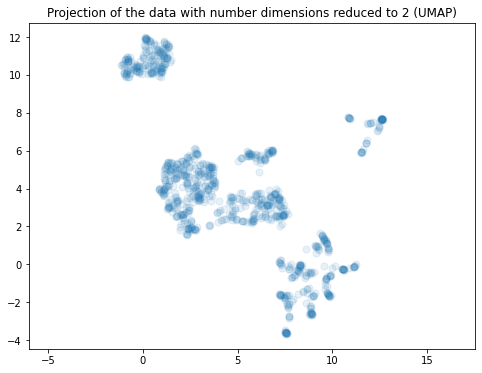

In [28]:
# UMAP is a dimension reduction technique such as PCA i would like to try these to check for clusters and then proceed with PCA also.
reducer = umap.UMAP()  
embedding = reducer.fit_transform(scaled) 
print(f'Shape: {embedding.shape[0]} rows, {embedding.shape[1]} columns (dimensions)')  

# defining a function to plot the cluster in 2D
def plotter_2d(title: str, cluster_labels=None, legend=False):
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels,
                     s=50, alpha=.1, cmap=cmap)  
    plt.gca().set_aspect('equal', 'datalim')
    if legend: 
        legend = plt.legend(*sc.legend_elements(alpha=.9), 
                            loc='best', title='clusters')
    plt.grid(False)
    plt.title(title)
    plt.show()


plotter_2d('Projection of the data with number dimensions reduced to 2 (UMAP)')   

#### From the above graph we conclude that we do have clusters , Next we will also try PCA ( Principal component analysis) 

### PCA

In [29]:
# Now that UMAP identified clusters lets perform PCA to represent the clusters in 2D or 3D

# Im gonna specify 3 as an argument to the PCA function for simplicity but you can specify any number based on your requirements

pca = PCA(n_components = 3)
pca_data = pca.fit_transform(scaled)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
print(f'\nCummulative explained variance, 3 principal components: \n{cum_var_explained}\n')
pca_df = pd.DataFrame(pca.transform(scaled), columns=(['PC1', 'PC2', 'PC3']))
pca_df.describe()



Cummulative explained variance, 3 principal components: 
[0.63526727 0.82171769 1.        ]



,PC1,PC2,PC3
count,1.000000e+03,1000.000000,1.000000e+03
mean,5.329071e-17,0.000000,4.263256e-17
std,1.992049e+00,1.079204,1.055300e+00
min,-3.531483e+00,-3.127958,-2.038766e+00
25%,-1.719584e+00,-0.687727,-7.431030e-01
50%,-6.736511e-01,0.031256,-1.527787e-01
75%,1.996645e+00,0.591998,6.421354e-01
max,3.668717e+00,4.616157,4.320272e+00


## HDBSCAN ( Density Based Clustering)

* Unlike other clustering algorithms , HDBSCAN does not need extensive hyper parameter tuning. In this case the cluster size and number of neighbors for a minimal cluster are sufficient


In [30]:
# i manualy picked the best parameters due to the fact grid search CV couldnt find the optimum value and the DBVC score it produced was much lower than this.

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=30, 
                            metric='manhattan', cluster_selection_method='leaf',
                            gen_min_span_tree=True)
clusterer.fit(pca_df)
print(f"DBCV score {clusterer.relative_validity_}")

DBCV score 0.003044270458840233


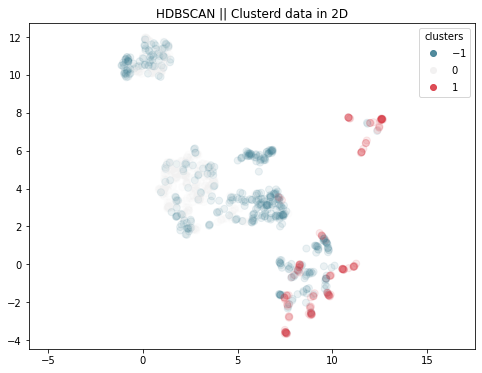

In [31]:
# we use the function we created above to plot the clusters in 2D
plotter_2d('HDBSCAN || Clusterd data in 2D', clusterer.labels_, legend=True)

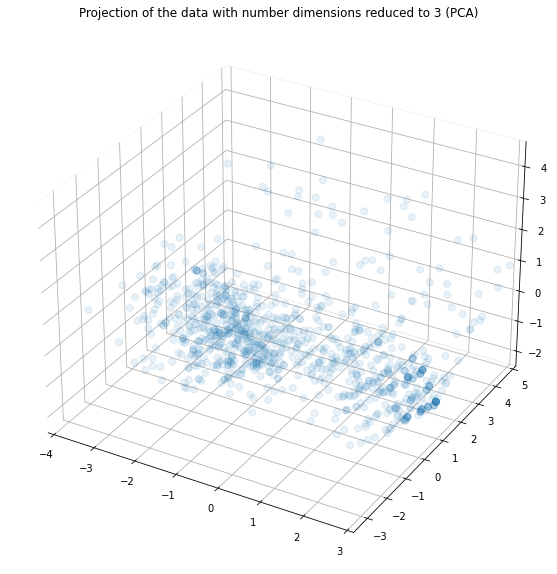

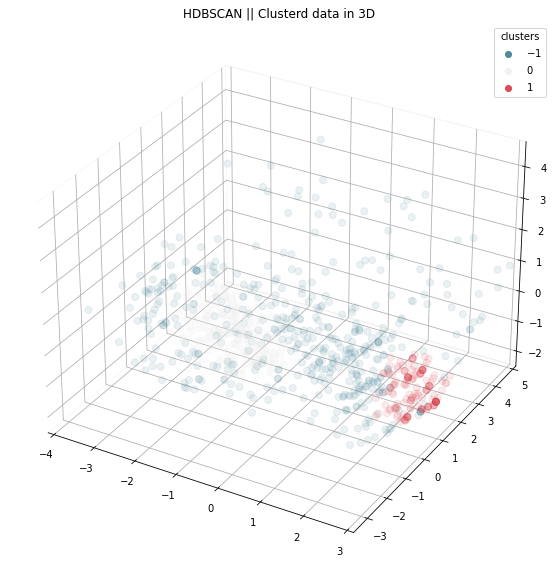

In [32]:
# Now lets define a fuction to plot the data in 3D
def plotter_3d(title: str, cluster_labels=None, legend=False):
    x, y, z = pca_df['PC1'], pca_df['PC2'], pca_df['PC3'] 
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection="3d")
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    sc = ax.scatter(x,y,z, c=cluster_labels, s=50, alpha=.1, cmap=cmap)
    ax.set_title(title)
    if legend: 
        legend = plt.legend(*sc.legend_elements(alpha=.9), 
                            loc='best', title='clusters')
    plt.xlim(-4, 3)
    plt.show()


plotter_3d('Projection of the data with number dimensions reduced to 3 (PCA)')

# visualize HBSCAN clusters in 3D
plotter_3d('HDBSCAN || Clusterd data in 3D', clusterer.labels_, legend=True)

In [33]:
# appending cluster labels to the original dataframe, aggregating the data
selected_features_1['HDBSCAN_cluster'] = clusterer.labels_.tolist()
selected_features_1.groupby('HDBSCAN_cluster').mean().T

C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


HDBSCAN_cluster,-1,0,1
past_hist,1.893478,1.165789,2.95000
not_effectively_treated,2.110870,2.686842,1.00000
current_status,1.921739,2.113158,1.04375
effectively_treated,2.143478,2.676316,1.00625
Gender,1.350000,1.265789,1.10625
country,6.084783,2.394737,2.62500
diagnosis,1.639130,1.097368,2.00000
career_effect,2.410870,2.231579,1.73125
awareness_program,1.969565,1.905263,1.51250
family_hist,1.880435,2.039474,1.37500


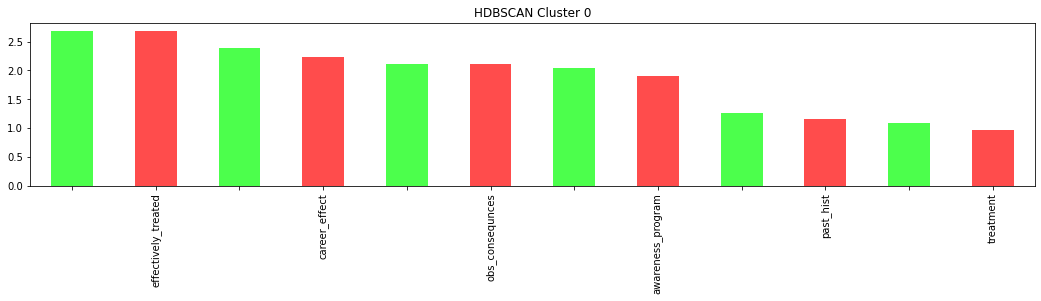

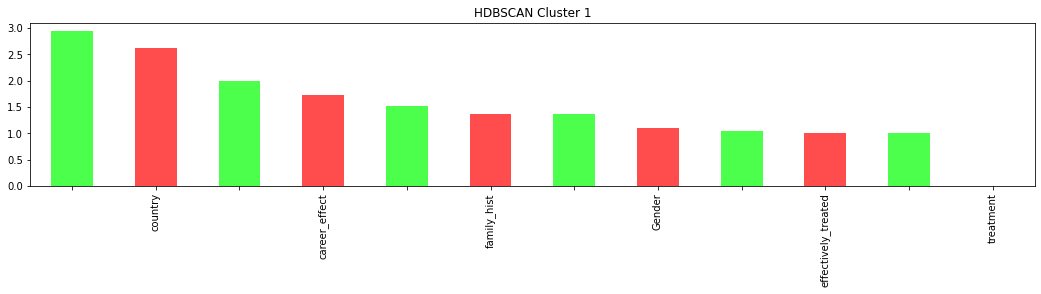

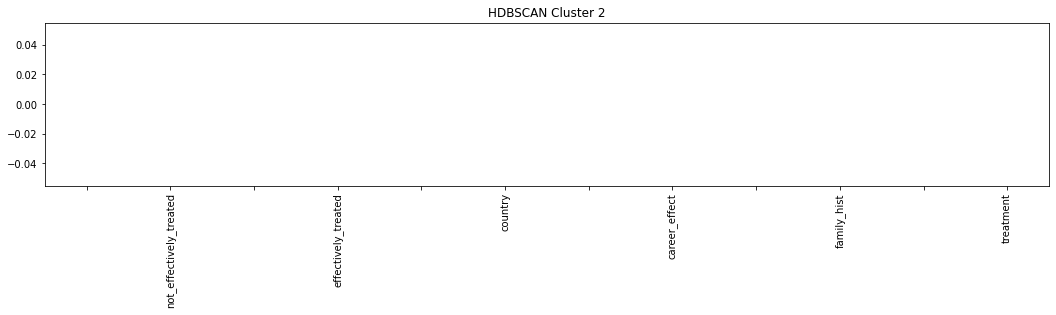

In [34]:
# get visual cluster by cluster 
for i in range(3): 
    plot = selected_features_1[selected_features_1['HDBSCAN_cluster'] == i].mean()[[col for col in selected_features_1.columns.tolist() 
                                        if col not in ['HDBSCAN_cluster']]].sort_values(
        ascending=False).plot.bar(figsize=(18,3), color=['lime','red'], alpha=.7)
    plt.title(f'HDBSCAN Cluster {i}')
    plt.setp(plot.get_xticklabels()[::2], visible=False)
    plt.grid(False)
    plt.show()

In [35]:
# print top-10 features per cluster
for i in range(3): 
    a = selected_features_1[selected_features_1['HDBSCAN_cluster'] == i].mean()[[col for col in selected_features_1.columns.tolist() 
                            if col not in ['HDBSCAN_cluster']]].sort_values(ascending=False)
    print(f'***HDBSCAN Cluster {i} ***', '\n'+30*'=', '\n', a[0:10], '\n'+30*'=')  

***HDBSCAN Cluster 0 *** 
 not_effectively_treated    2.686842
effectively_treated        2.676316
country                    2.394737
career_effect              2.231579
current_status             2.113158
obs_consequnces            2.113158
family_hist                2.039474
awareness_program          1.905263
Gender                     1.265789
past_hist                  1.165789
dtype: float64 
***HDBSCAN Cluster 1 *** 
 past_hist              2.95000
country                2.62500
diagnosis              2.00000
career_effect          1.73125
awareness_program      1.51250
family_hist            1.37500
obs_consequnces        1.36875
Gender                 1.10625
current_status         1.04375
effectively_treated    1.00625
dtype: float64 
***HDBSCAN Cluster 2 *** 
 past_hist                 NaN
not_effectively_treated   NaN
current_status            NaN
effectively_treated       NaN
Gender                    NaN
country                   NaN
diagnosis                 NaN
career_

#### Observation

* We see that HDBSCAN found 3 clusters in the data 
* Cluster 2 is just sorted out noise data points. 
* It looks like people of cluster 1 are neither here not there and will be diagnosed at a 
moderate level. 
* The people of cluster 0 , however, are at high risk of being positively diagnosed with metal 
health disorder

## K Means Clustering

### Elbow Method to find the number of clusters that would provide optimum results

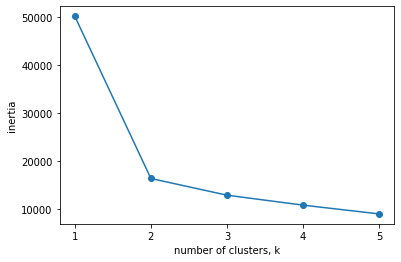

In [36]:
ks = range(1, 6)
inertias = []                  # lower the inertia better the model

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(selected_features_1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



### Implementing PCA with 2 components then Kmeans

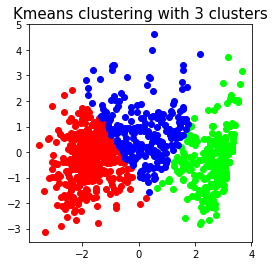

In [37]:
# First we reduce the dimensions using PCA to 2
pcaa = PCA(n_components=2)
df_pca = pcaa.fit_transform(scaled)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PC1','PC2']
# we now create 3 clusters as suggested by the elbow method

km = KMeans(n_clusters=3)
y_hat = km.fit_predict(df_pca[['PC1','PC2']])
y_hat
df_pca['cluster'] = y_hat

# creating 3 different data frames to plot

df_pca1 = df_pca[df_pca['cluster']==0]
df_pca2 = df_pca[df_pca['cluster']==1]
df_pca3 = df_pca[df_pca['cluster']==2]

# plotting the clusters 

plt.rcParams['figure.figsize']=[4,4]
plt.title('Kmeans clustering with 3 clusters',size=15)
plt.scatter(df_pca1['PC1'],df_pca1['PC2'],color='lime')
plt.scatter(df_pca2['PC1'],df_pca2['PC2'],color='red')
plt.scatter(df_pca3['PC1'],df_pca3['PC2'],color='blue')

